In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Loading dataset
WORKPATH = r"./"
# from google.colab import drive
# drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Reading Dataset and displaying first 5 rows
df = pd.read_csv(r'healthcare-dataset-stroke-data.csv')
df


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [12]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [13]:
df= df.drop(['id'], axis=1)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [14]:
# le = LabelEncoder()
# df = le.fit_transform(df[])
# newdf=df

In [15]:
# label_encoder = LabelEncoder()
# # df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
# # df['ever_married_encoded'] = label_encoder.fit_transform(df['ever_married'])
# # df['work_type_encoded'] = label_encoder.fit_transform(df['work_type'])
# # df['Residence_type_encoded'] = label_encoder.fit_transform(df['Residence_type'])
# # df['smoking_status_encoded'] = label_encoder.fit_transform(df['smoking_status'])

# df['gender'] = label_encoder.fit_transform(df['gender'])
# df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
# df['work_type'] = label_encoder.fit_transform(df['work_type'])
# df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
# df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

In [16]:
from sklearn.preprocessing import OneHotEncoder
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
categorical_data = df[categorical_variables]
encoder = OneHotEncoder(sparse_output = False)
encoded_data = encoder.fit_transform(categorical_data)
encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_variables))
df = pd.concat([df.drop(columns=categorical_variables), encoded_dataframe], axis=1)
df.head(5)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,NaN,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.5,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.4,1,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()
testdf = df[df['bmi'].isnull()==True]
traindf = df[df['bmi'].isnull()==False]
y = traindf['bmi']
traindf.drop("bmi",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("bmi",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['bmi']= pred
df = testdf



/var/folders/fj/pw9q52gs5p5d3wmrd3xgcm980000gn/T/ipykernel_98502/3984337551.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("bmi",axis=1,inplace=True)
/var/folders/fj/pw9q52gs5p5d3wmrd3xgcm980000gn/T/ipykernel_98502/3984337551.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("bmi",axis=1,inplace=True)
/var/folders/fj/pw9q52gs5p5d3wmrd3xgcm980000gn/T/ipykernel_98502/3984337551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [18]:
df.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
bmi                               0
dtype: int64

In [19]:
# if 'stroke' in testdf.columns:
#     df = testdf.drop(columns=['stroke'])

# # # Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["Feature"] = df.columns
# vif_data["VIF"] = [variance_inflation_factor(df.values, i)
# for i in range(len(df.columns))]

# # # Display VIF values
# print(vif_data)

In [20]:
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap between Age, BMI, and Average Glucose Level')
# plt.show()

In [ ]:
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap between Age, BMI, and Average Glucose Level')
# plt.show()

In [ ]:
# df.skew().sort_values(ascending=False)

In [ ]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [ ]:
# pip install statsmodels

/Users/asmabashir/anaconda3/envs/my_f_e/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/asmabashir/anaconda3/envs/my_f_e/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


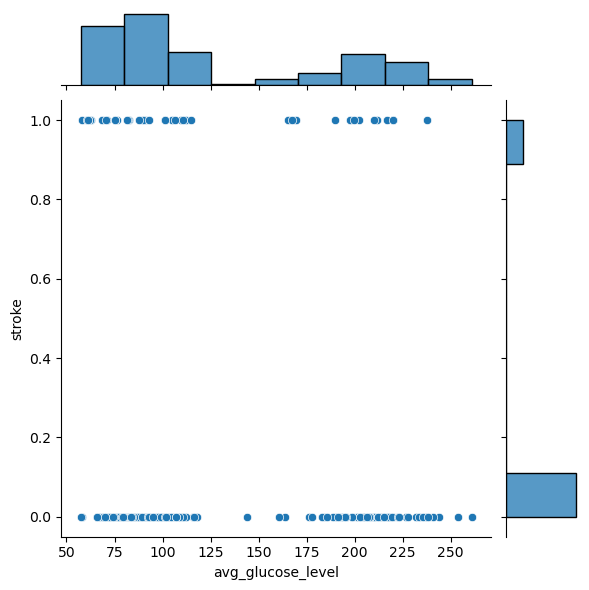

In [21]:
sns.jointplot(data=df, x='avg_glucose_level', y='stroke')
plt.show()

In [ ]:
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
# if 'stroke' in testdf.columns:
#     df = testdf.drop(columns=['stroke'])

# # # Calculate VIF for each feature
# vif_data = pd.DataFrame()
# vif_data["Feature"] = df.columns
# vif_data["VIF"] = [variance_inflation_factor(df.values, i)
# for i in range(len(df.columns))]

# # # Display VIF values
# print(vif_data)